In [52]:
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import isfile, join
import numpy as np


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0
(512, 512, 3)


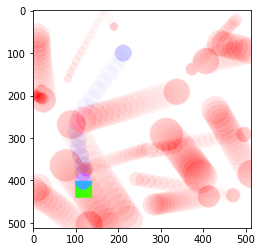

In [107]:
path = "experiments/14/images/04"
all_images = [f for f in listdir(path) if isfile(join(path, f))]
all_images.sort()
img = cv2.imread(path+"/"+all_images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.float32(img)/255.0
print(np.amax(img))
print(img.shape)
lower = np.array([0.9, 0.9, 0.9])
upper = np.array([1.1, 1.1, 1.1])
mask = np.float32(cv2.inRange(img, lower, upper))/255.0
mask = 1.0-mask
mask = np.expand_dims(mask,2)
mask = np.concatenate((mask,mask,mask),axis=2)
# img[mask==0.0] = 0.0
# plt.imshow(img)
# plt.show()
for i, image in enumerate(all_images):
    if i == 0: continue
    if i%2 ==0: continue
    current_img = cv2.imread(path+"/"+image)
    current_img = cv2.cvtColor(current_img, cv2.COLOR_BGR2RGB)
    current_img = np.float32(current_img)/255.0
    
    mask = np.float32(cv2.inRange(current_img, lower, upper))/255.0
    mask = 1.0-mask
    mask = np.expand_dims(mask,2)
    mask = np.concatenate((mask,mask,mask),axis=2)
    # current_img[mask==0.0] = 0.0
    img = cv2.addWeighted(img, 0.9, current_img, 0.1, 0.0)
    current_img[mask==0.0] = 0.0
    
    # img += 0.1*current_img

# img = cv2.addWeighted(img, 0.9, current_img, 0.5, 0.0)
img += 0.9*current_img
# img = np.clip(img,0.0,1.0)
# img[:,:,2] *=10.0
# img[:,:,0] *=.9

plt.imshow(img)
plt.show()
# lower = np.array([-0.01]*3)
# upper = np.array([0.01]*3)
# mask = np.float32(cv2.inRange(img, lower, upper))/255.0
# mask = 1.0-mask
# mask = np.expand_dims(mask,2)
# mask = np.concatenate((mask,mask,mask),axis=2)
# img[mask==0.0] = 1.0

# # img = np.clip(img,0.0,1.0)
# plt.imshow(img)
# plt.show()